In [1]:
import pandas as pd

mcdonalds = pd.read_csv("mcdonalds.csv") 

print(mcdonalds.columns.tolist())

print(mcdonalds.shape)


print(mcdonalds.head(3))


['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


# Step 4 


In [2]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [3]:
import pandas as pd


MD_x = mcdonalds.iloc[:, 0:11].apply(lambda x: (x == "Yes").astype(int))

result = round(MD_x.mean(), 2)

print(result)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA()

MD_pca = pca.fit(MD_x)

print("Importance of components:")
print(pd.DataFrame({'Standard deviation': np.sqrt(MD_pca.explained_variance_),
                    'Proportion of Variance': MD_pca.explained_variance_ratio_,
                    'Cumulative Proportion': np.cumsum(MD_pca.explained_variance_ratio_)},
                    index=[f'PC{i+1}' for i in range(len(MD_pca.explained_variance_))]))


Importance of components:
      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1             0.757050                0.299447               0.299447
PC2             0.607456                0.192797               0.492244
PC3             0.504619                0.133045               0.625290
PC4             0.398799                0.083096               0.708386
PC5             0.337405                0.059481               0.767866
PC6             0.310275                0.050300               0.818166
PC7             0.289697                0.043849               0.862015
PC8             0.275122                0.039548               0.901563
PC9             0.265251                0.036761               0.938323
PC10            0.248842                0.032353               0.970677
PC11            0.236903                0.029323               1.000000


In [5]:

print("Standard deviations (1, .., p=11):")
print(np.round(MD_pca.explained_variance_, decimals=1))

print("Rotation (n x k) = (11 x 11):")
rotation_matrix = pd.DataFrame(MD_pca.components_.T, columns=[f'PC{i+1}' for i in range(len(MD_pca.components_))],
                                index=['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'])
print(rotation_matrix.round(decimals=3))


Standard deviations (1, .., p=11):
[0.6 0.4 0.3 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Rotation (n x k) = (11 x 11):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy      -0.477  0.364 -0.304  0.055 -0.308  0.171 -0.281  0.013  0.572   
convenient -0.155  0.016 -0.063 -0.142  0.278 -0.348 -0.060 -0.113 -0.018   
spicy      -0.006  0.019 -0.037  0.198  0.071 -0.355  0.708  0.376  0.400   
fattening   0.116 -0.034 -0.322 -0.354 -0.073 -0.407 -0.386  0.590 -0.161   
greasy      0.304 -0.064 -0.802  0.254  0.361  0.209  0.036 -0.138 -0.003   
fast       -0.108 -0.087 -0.065 -0.097  0.108 -0.595 -0.087 -0.628  0.166   
cheap      -0.337 -0.611 -0.149  0.119 -0.129 -0.103 -0.040  0.140  0.076   
tasty      -0.472  0.307 -0.287 -0.003 -0.211 -0.077  0.360 -0.073 -0.639   
expensive   0.329  0.601  0.024  0.068 -0.003 -0.261 -0.068  0.030  0.067   
healthy    -0.214  0.077  0.192  0.763  0.288 -0.178 -0.350  0.176 -0.186   
disgusting  0.375 -0.140 -0.089  0.370 -0.

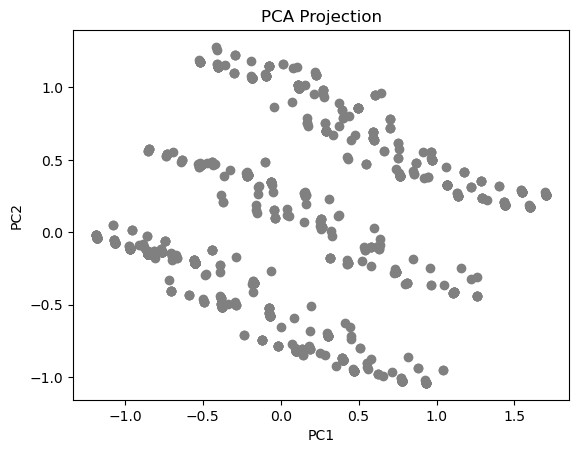

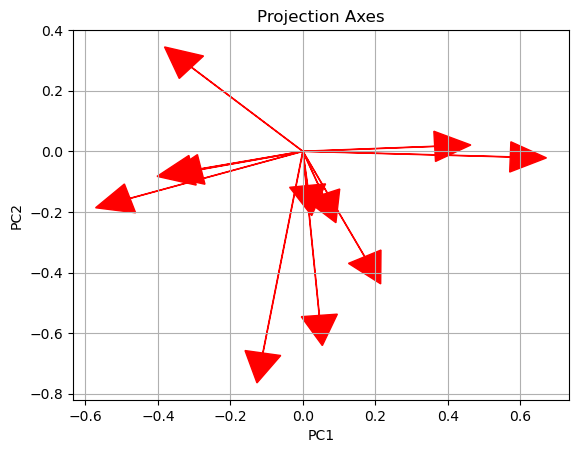

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()

plt.figure()
for length, vector in zip(MD_pca.explained_variance_, MD_pca.components_):
    plt.arrow(0, 0, vector[0], vector[1], head_width=0.1, head_length=0.1, fc='r', ec='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection Axes')
plt.grid()
plt.show()


# Step 5 : Extracting Segments

### Using K-Means

In [7]:
pip install scikit-learn-extra


Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn_extra.cluster import KMedoids


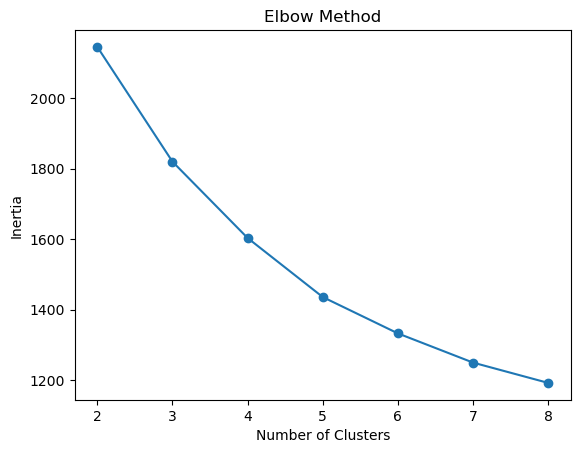

In [9]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


np.random.seed(1234)

inertia_values = {}


for k in range(2, 9):

    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values[k] = kmeans.inertia_


plt.plot(list(inertia_values.keys()), list(inertia_values.values()), marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


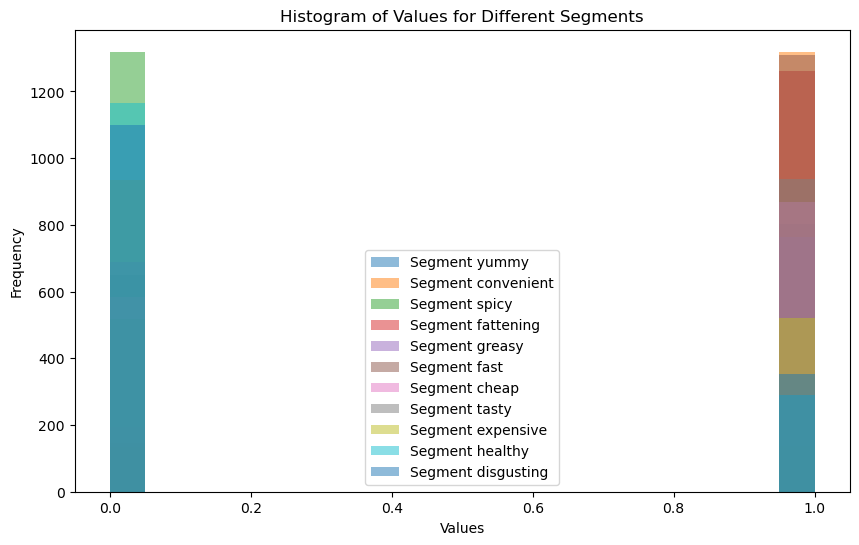

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for segment, data in MD_x.items():
    plt.hist(data, bins=20, alpha=0.5, label=f'Segment {segment}')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values for Different Segments')
plt.legend()
plt.show()


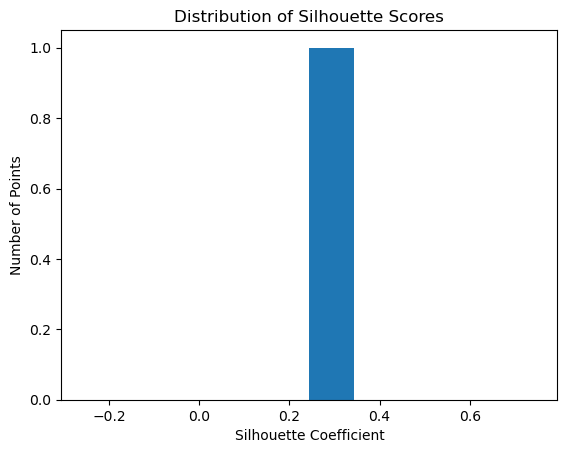

In [20]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = silhouette_score(,kmeans.labels_)
plt.hist(silhouette_coefficients)
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Number of Points")
plt.title("Distribution of Silhouette Scores")
plt.show()



# Using Mixtures of Distributions


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Best number of clusters: 8


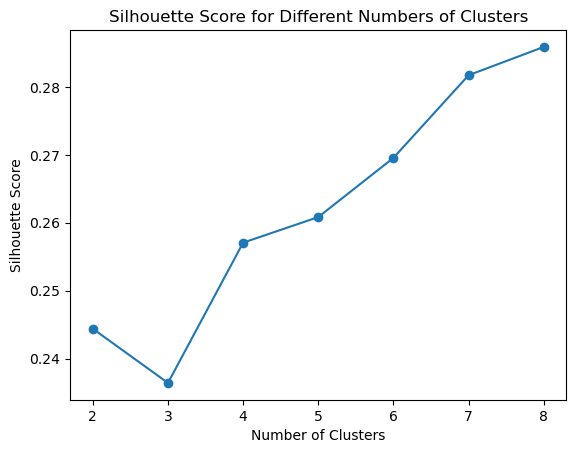

In [21]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming MD_x contains your data

# Perform KMeans clustering with different numbers of clusters
k_values = range(2, 9)
kmeans_models = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MD_x)
    kmeans_models.append(kmeans)

# Calculate silhouette scores for each clustering result
silhouette_scores = [silhouette_score(MD_x, kmeans.labels_) for kmeans in kmeans_models]

# Find the index of the best silhouette score
best_k_index = np.argmax(silhouette_scores)
best_k = k_values[best_k_index]

print(f'Best number of clusters: {best_k}')

# Plot silhouette scores
import matplotlib.pyplot as plt

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()


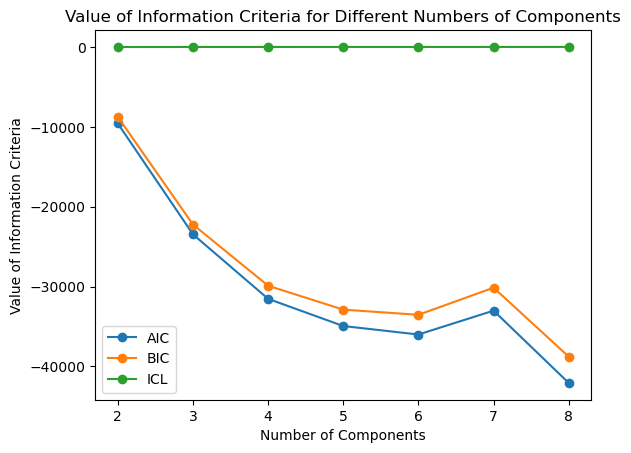

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

n_components_range = range(2, 9)
aic_values = []
bic_values = []
icl_values = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(MD_x)
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))
    icl_values.append(gmm.lower_bound_)

plt.plot(n_components_range, aic_values, marker='o', label='AIC')
plt.plot(n_components_range, bic_values, marker='o', label='BIC')
plt.plot(n_components_range, icl_values, marker='o', label='ICL')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.title('Value of Information Criteria for Different Numbers of Components')
plt.legend()
plt.show()


In [24]:
import numpy as np

kmeans_labels = [1, 2, 3, 4]  
mixture_labels = [1, 2, 3, 4]  

kmeans_clusters = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])
mixture_clusters = np.array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

contingency_table = np.zeros((len(kmeans_labels), len(mixture_labels)), dtype=int)

for kmeans_label, mixture_label in zip(kmeans_clusters, mixture_clusters):
    contingency_table[kmeans_label - 1, mixture_label - 1] += 1


print("Contingency Table:")
print(contingency_table)


Contingency Table:
[[ 4  0  0  0]
 [ 0  4  0  0]
 [ 0  5  0  0]
 [ 0 12  0  0]]


# Step 6: Profiling Segments

In [36]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage


MD_x_transposed = np.transpose(MD_x)

distances = pdist(MD_x_transposed)

MD_vclust = linkage(distances)

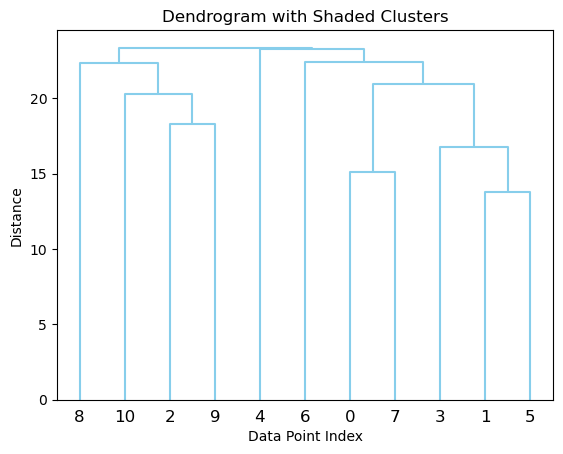

In [37]:
from scipy.cluster.hierarchy import dendrogram

MD_vclust_order = list(reversed(range(1, len(MD_vclust) + 1)))
dendrogram(MD_vclust, color_threshold=0, above_threshold_color='skyblue', orientation='top')

plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.title('Dendrogram with Shaded Clusters')

plt.show()

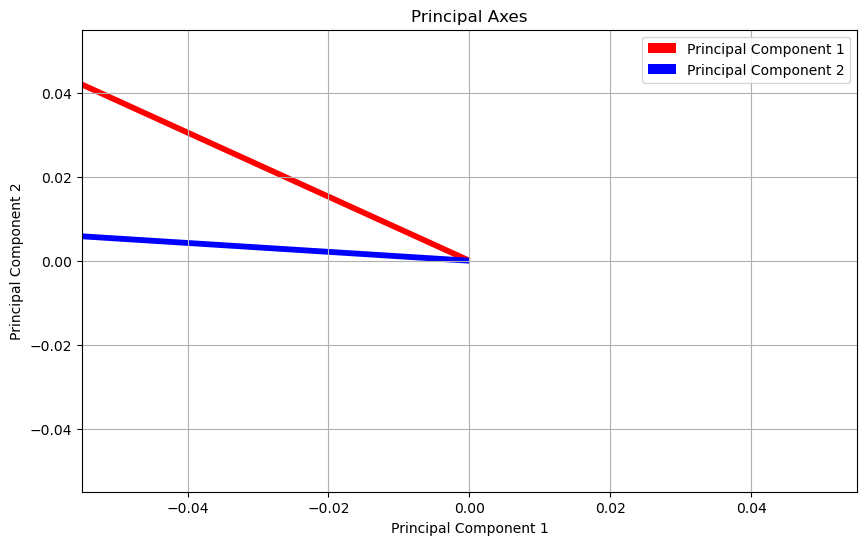

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming MD_pca contains the PCA model

# Plot principal axes
plt.figure(figsize=(10, 6))
plt.quiver(0, 0, MD_pca.components_[0, 0], MD_pca.components_[1, 0], angles='xy', scale_units='xy', scale=1, color='r', label='Principal Component 1')
plt.quiver(0, 0, MD_pca.components_[0, 1], MD_pca.components_[1, 1], angles='xy', scale_units='xy', scale=1, color='b', label='Principal Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Axes')
plt.legend()
plt.grid()
plt.show()
